In [5]:
import os
import zipfile


In [17]:
potato_dir = os.path.join('Potato')
hamburger_dir = os.path.join('Hamburger')
beer_dir = os.path.join('Beer')

print('total training potato images:', len(os.listdir(potato_dir)))
print('total training hamburger images:', len(os.listdir(hamburger_dir)))
print('total training beer images:', len(os.listdir(beer_dir)))

potato_files = os.listdir(potato_dir)
print(potato_files[:10])

hamburger_files = os.listdir(hamburger_dir)
print(hamburger_files[:10])

beer_files = os.listdir(beer_dir)
print(beer_files[:10])


total training potato images: 188
total training hamburger images: 574
total training beer images: 800
['potato (1).jpg', 'potato (10).jpg', 'potato (100).jpg', 'potato (101).jpg', 'potato (102).jpg', 'potato (103).jpg', 'potato (104).jpg', 'potato (105).jpg', 'potato (106).jpg', 'potato (107).jpg']
['hamburger (1).jpg', 'hamburger (10).jpg', 'hamburger (100).jpg', 'hamburger (101).jpg', 'hamburger (102).jpg', 'hamburger (103).jpg', 'hamburger (104).jpg', 'hamburger (105).jpg', 'hamburger (106).jpg', 'hamburger (107).jpg']
['beer (1).jpg', 'beer (10).jpg', 'beer (100).jpg', 'beer (101).jpg', 'beer (102).jpg', 'beer (103).jpg', 'beer (104).jpg', 'beer (105).jpg', 'beer (106).jpg', 'beer (107).jpg']


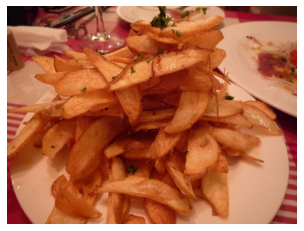

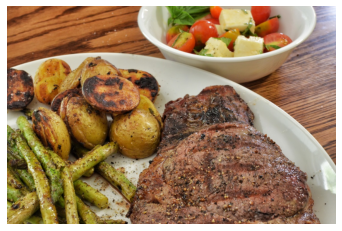

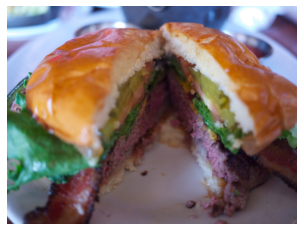

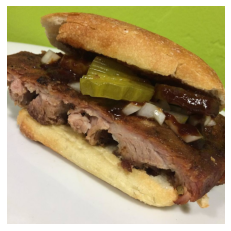

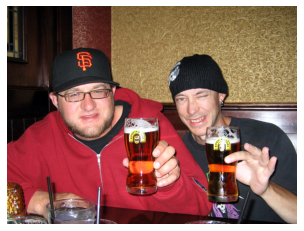

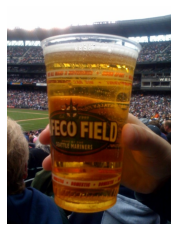

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_potato = [os.path.join(potato_dir, fname) 
                for fname in potato_files[pic_index-2:pic_index]]
next_hamburger = [os.path.join(hamburger_dir, fname) 
                for fname in hamburger_files[pic_index-2:pic_index]]
next_beer = [os.path.join(beer_dir, fname) 
                for fname in beer_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_potato+next_hamburger+next_beer):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")
